# Example of possible use of the iMaNGA VAC

## the iMaNGA VAC can be download here

### https://www.tng-project.org/data/docs/specifications/#sec5_4

### The description of the data structure is in the same page

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from tqdm import tqdm

import sys, os
from os.path import join

from mpl_toolkits.axes_grid1 import make_axes_locatable


import matplotlib.colors as colors


sys.path.insert(0, "./mplt_style.py")

import matplotlib as mpl

import mplt_style

plt.style.use(mplt_style.style1)

from astropy.io import fits


sys.path.insert(0, "/users/lnanni/.conda/envs/env/lib/python3.7/site-packages")


In [ ]:
# load the iMaNGA VAC

In [ ]:
VAC =  fits.open("./iMaNGA_VAC.fit")

In [205]:
std_0 = []


In [206]:
for index in range(len(VAC[1].data)):
    
    grid =  VAC[3].data[2,index,:,:].flatten() # FoV grid
    position = VAC[3].data[0,index,:,:].flatten() # position of the spaxels
    std = VAC[4].data[1,index,:,:].flatten()[grid==True] # velocity dispersion by pPXF
    
    std_0.append(np.nanmedian(std[position[grid==True]<1.5])) # median of central velocity dispersion


In [207]:
tot_mass = np.log10(np.nansum(10**VAC[10].data[0,:,:,:], axis=(-2,-1))) # total mass from Firefy
t_morph = VAC[2].data["T_morph"] # T morphology
std_0 = np.array(std_0)


In [129]:
from matplotlib.colors import LinearSegmentedColormap
from scipy.ndimage import gaussian_filter

from matplotlib.colors import ListedColormap


In [132]:
col_dict={-3:"red",
          0:"green",
          3:"blue",
          10:"orange"}

cm = ListedColormap([col_dict[x] for x in col_dict.keys()])


labels = np.array(["Irr/merger : 10", "LTG : 3", "S0 : 0", "E : -3"])
len_lab = len(labels)

norm_bins = np.sort([*col_dict.keys()]) + 0.5
norm_bins = np.insert(norm_bins, 0, np.min(norm_bins) - 1.0)
norm = matplotlib.colors.BoundaryNorm(norm_bins, len_lab, clip=True)
fmt = matplotlib.ticker.FuncFormatter(lambda x, pos: labels[norm(x)])




In [151]:
string = str(3)+str("''")

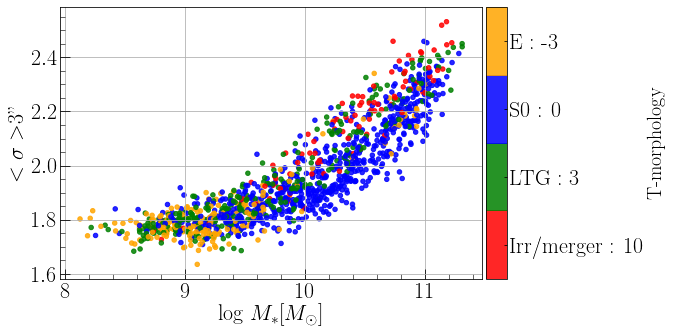

In [212]:
fig,ax = plt.subplots(figsize=(8, 5))

plt.minorticks_on()
plt.tick_params(length=10, which='major', direction="in", labelsize=22)
plt.tick_params(length=5, which='minor', direction="in", labelsize=22)
plt.grid(which = "major")
    
im = plt.scatter(tot_mass, np.log10(std_0), c = VAC[2].data["T_morph"], cmap=cm, norm=norm, alpha=0.85, s=20)

diff = norm_bins[1:] - norm_bins[:-1]
tickz = norm_bins[:-1] + diff / 2

divider = make_axes_locatable(ax)
cax = divider.append_axes('right', size='5%', pad=0.05)
    
cb = plt.colorbar(im, cax=cax, format=fmt, ticks=tickz,)
cb.set_label("T-morphology", fontsize=20)

cax.tick_params(labelsize=22, direction='in')

ax.set_xlabel(" log $M_* [M_\odot]$", fontsize=22)
ax.set_ylabel(r"$<\sigma>$"+string, fontsize=22)

plt.savefig("./paperIII/Figure/kinematics1.pdf",bbox_inches = 'tight')  

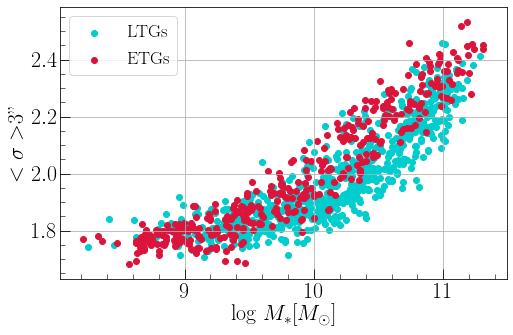

In [213]:
# Plot our figure
fig,ax = plt.subplots(figsize=(8, 5))

plt.minorticks_on()
plt.tick_params(length=10, which='major', direction="in", labelsize=22)
plt.tick_params(length=5, which='minor', direction="in", labelsize=22)
plt.grid(which = "major")
    
plt.scatter(tot_mass[(t_morph==3)], np.log10(std_0[(t_morph==3)]), color="#00CDCD", label="LTGs")

plt.scatter(tot_mass[(t_morph==-3)], np.log10(std_0[t_morph==-3]), color="#DC143C")
plt.scatter(tot_mass[(t_morph==-0)], np.log10(std_0[t_morph==-0]), color="#DC143C", label="ETGs")

ax.legend(fontsize=18, loc="upper left")


ax.set_xlabel(" log $M_* [M_\odot]$", fontsize=22)
ax.set_ylabel(r"$<\sigma>$"+string, fontsize=22)

plt.savefig("./paperIII/Figure/kinematics2.pdf",bbox_inches = 'tight')  